# Ponder This - April


This month's challenge is inspired by the COVID-19 pandemic.
Suppose that the world has five people and they are all connected to one another as depicted by the five-verticed graph in the following picture:

![graph](http://www.research.ibm.com/haifa/ponderthis/images/ponder0420.jpg)

Let's assume that the infection passes daily along the edges. So, if on day t, "D" is infected and "C" is healthy, then "C" has a 10% chance of getting infected on day t+1.
If "A" is infected at time 0, after ten days, there is about a 29.16521896% probability that all five will be infected.

Find a graph with no more than eight vertices that gives a probability of 70.00% (accurate to the second decimal digit after the decimal point) of all people/vertices being infected after ten days.
Give your answer as an adjacency matrix.
For example, the adjacency matrix of the graph depicted above is

```
01110
10001
10010
10101
01010
```


---

Update (3/4): We meant to ask after 19 days (which can give solution with a better approximation), but we will accept also answers for 10 days.

In [3]:
import numpy as np

In [4]:
!pip install frigidum --upgrade

  Found existing installation: frigidum 0.0.1
    Uninstalling frigidum-0.0.1:
      Successfully uninstalled frigidum-0.0.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
adj_matrix = np.array([[0, 1, 1, 1, 0],
                       [1, 0, 0, 0, 1],
                       [1, 0, 0, 1, 0],
                       [1, 0, 1, 0, 1],
                       [0, 1, 0, 1, 0]])

In [6]:
"""
Helper function

Example: 

    create_binary_array(3)

    array([[0, 0, 0],
           [0, 0, 1],
           [0, 1, 0],
           [0, 1, 1],
           [1, 0, 0],
           [1, 0, 1],
           [1, 1, 0],
           [1, 1, 1]], dtype=uint8)
       
"""

def create_binary_array(nodes=5, odd_only=False):
    decimal_range = np.array( np.reshape( np.arange(2**nodes), (2**nodes,1)) , dtype=np.uint8)
    binary_range = np.unpackbits(decimal_range, axis=1)
    binary_range = binary_range[:,-nodes:]

    if odd_only:
        return binary_range[1::2]
    
    return binary_range

In [7]:
create_binary_array(3, odd_only=True)

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]], dtype=uint8)

In [8]:
"""
In the transition matrix, 

state 1: 0,0,0,0,1
state 2: 0,0,0,1,1
state 3: 0,0,1,0,1
...
state N: 1,1,1,1,1

We use state_to_transition_matrix_index()
to get the right index, given a state vector

"""

def state_to_transition_matrix_index(state):
    bin_array = np.zeros(8, dtype=np.uint8)
    bin_array[-state.size:]=np.flip(state)

    return int( (np.packbits(bin_array, axis=0)[0] - 1) / 2 )

In [9]:
"""
Given a adjacency matrix,
Calculates the transistion matrix.

"""

def transition_matrix(adj_matrix, debug=False):
    nodes = adj_matrix.shape[0]
    if debug:
        print("Nodes: {}".format(nodes))
        print("Adjacent Matrix: \n{}".format(adj_matrix))
    binary_array = create_binary_array(nodes)
    
    transition_matrix = np.zeros((2**(nodes-1), 2**(nodes-1)))
    
    reachable_states = create_binary_array(nodes,odd_only=True)
    
    for state_to_explode in reachable_states:
        
        state_to_explode = np.flip(state_to_explode)
        if debug:
            print("=================")
            
        if debug:
            print("State to explore: {}".format(state_to_explode))
        
        none_zero_indici = np.where( state_to_explode )
        if debug:
            print( "None Zero Indicis: {}".format(none_zero_indici))
        
        reachable_states_count =  np.sum( adj_matrix[ none_zero_indici ], axis=0)
        reachable_states_count = reachable_states_count * (1- state_to_explode)
        
        if debug:
            print( "Reachable States Counts: {}", reachable_states_count)
        
        probabilities_to_infect = 1 - (.9 ** reachable_states_count)
        
        if debug:
            print( "Probabilities to Infect: {}".format(probabilities_to_infect))
    
        number_of_reachable_states = np.nonzero( reachable_states_count )[0].size
        
        if debug:
            print(("Reachable States Number: {}".format(number_of_reachable_states)))
        
        if number_of_reachable_states == 0:
            continue
        
        binary_array_states = create_binary_array(number_of_reachable_states)
        
        if debug:
            print( "Binary State Array: \n{}".format(binary_array_states) )
        
        only_probs_to_infect = probabilities_to_infect[np.nonzero(probabilities_to_infect)]
        
        binary_array_states_probs = binary_array_states * only_probs_to_infect + (1 - binary_array_states) * (1- only_probs_to_infect)
        
        
        state_probs = np.prod(binary_array_states_probs,axis=1)
        #print(state_probs)
        
        new_states = np.tile( state_to_explode, reps=(2**number_of_reachable_states,1))
        new_states[ :,np.nonzero(reachable_states_count)[0] ]= binary_array_states
       
        if debug:
            print( "Bin State Probs: \n{}".format(binary_array_states_probs))
            print( "State Probs: \n{}".format(state_probs))
            print( "State Probs: \n{}".format(state_probs.shape))
            print( "SUM: {}".format(np.sum(state_probs)))
        
        current_state_index = state_to_transition_matrix_index(state_to_explode)
        
        if debug:
            print("current State Index: {}".format(current_state_index))
                
        binary_index_helper = np.zeros((2**number_of_reachable_states,8))
        flipped_new_states = np.flip(new_states,axis=1)
        binary_index_helper[:,-nodes:] = flipped_new_states
        binary_index_helper = np.array(binary_index_helper,dtype=np.uint8)
        binary_index_helper = binary_index_helper

        indices_for_tr = np.packbits(binary_index_helper, axis=1)
        indices_for_tr =indices_for_tr - 1
        indices_for_tr = np.array( indices_for_tr / 2, dtype=np.int)
        
        reshapes_state_probs = state_probs.reshape(-1,1)

        transition_matrix[current_state_index, indices_for_tr] = reshapes_state_probs
        
    
    transition_matrix[2**(nodes -1)-1,2**(nodes -1)-1] = 1
    
    transition_matrix[np.diag_indices(2**(nodes-1))] = np.diag(transition_matrix) + 1 - np.sum(transition_matrix,axis=1)
    return transition_matrix
    

In [10]:
tr_test = transition_matrix(adj_matrix, debug=False)

In [11]:
np.linalg.matrix_power(tr_test,10)[0][-1]

0.2916521896015064

In [12]:
after_19_opt = np.array([[0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.]])


tr_19 = transition_matrix(after_19_opt)

np.linalg.matrix_power(tr_19,19)[0][-1]

0.7000008653156913

In [13]:
after_10_opt = np.array([[0., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1., 0., 1.],
       [1., 1., 1., 0., 1., 1., 1., 0.]])

tr_10 = transition_matrix(after_10_opt)

np.linalg.matrix_power(tr_10,10)[0][-1]

0.7000748730017619

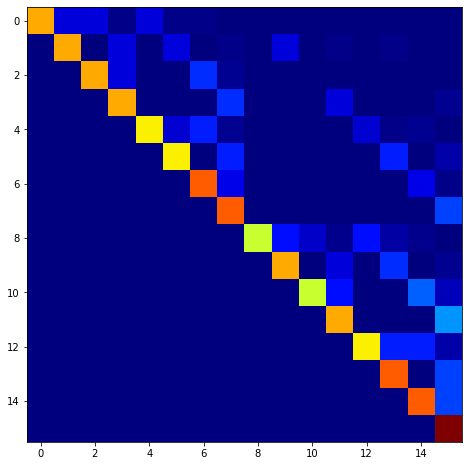

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,8))
plt.imshow(tr_test, cmap='jet', interpolation='nearest')
plt.show()

In [15]:
def random_start(nodes=8):
    A = np.zeros((nodes,nodes))
    A[np.tril_indices(nodes,k=-1)]  = 1* (np.random.random(np.tril_indices(nodes,k=-1)[0].size) > .2)

    A = A + A.T
    return A

In [16]:
random_start(8)

array([[0., 1., 1., 1., 0., 0., 1., 1.],
       [1., 0., 1., 1., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 1., 0.]])

In [17]:
def cost_function(adj_matrix):
    tr = transition_matrix(adj_matrix)
    return np.linalg.matrix_power(tr,10)[0][-1]

def delta_cost_function(adj_matrix):
    return np.abs( .70 - cost_function(adj_matrix) )

In [18]:
import random

def random_flip( adj_matrix ):
    new_adj_matrix = adj_matrix.copy()
    nodes = adj_matrix.shape[0]
    indices = np.array( [np.tril_indices(nodes,k=-1)[0],np.tril_indices(nodes,k=-1)[1]] ).T
    random_index = indices[ np.random.randint(indices.shape[0]) ]

    new_adj_matrix[random_index[0],random_index[1]] = 1 - new_adj_matrix[random_index[0],random_index[1]]
    new_adj_matrix[random_index[1],random_index[0]] = new_adj_matrix[random_index[0],random_index[1]]
    
    return new_adj_matrix

def random_switch( adj_matrix ):
    new_adj_matrix = adj_matrix.copy()
    nodes = adj_matrix.shape[0]
    
    indices = np.array( [np.tril_indices(nodes,k=-1)[0],np.tril_indices(nodes,k=-1)[1]] ).T
    
    the_ones = list(zip(*np.where(new_adj_matrix)))
    the_zeros = list(zip(*np.where(1 - new_adj_matrix)))
    the_triangle = list(zip(*np.tril_indices(8,k=-1)))
    
    ones_indices = list(set(the_ones).intersection(set(the_triangle)))   
    zero_indices = list(set(the_zeros).intersection(set(the_triangle)))   
    
    random_one = random.choice( ones_indices )
    random_zero = random.choice( zero_indices )
    
    new_adj_matrix[random_one] = 0
    new_adj_matrix[random_zero] = 1
    
    new_adj_matrix[random_one[::-1]] = 0
    new_adj_matrix[random_zero[::-1]] = 1
    
    return new_adj_matrix

## Simulated Annealing Scheme with Frigidum


In [19]:
import frigidum

In [20]:
local_opt = frigidum.sa(random_start=random_start, 
                        objective_function=delta_cost_function, 
                        neighbours=[random_flip, random_switch, random_switch, random_switch], 
                        T_start=1, 
                        alpha=.95, 
                        repeats=50, 
                        T_stop=0.005)

T: 0.005, M: 0.14, C_min:  0.0001, C_current:  0.0014: 100%|██████████| 104/104 [06:57<00:00,  4.02s/cooling]

---
Best Found Cost: 0.00007487


In [20]:
cost_function(local_opt[0])

0.7000748730017614

In [21]:
import pprint

def print_solution(local_opt):
    print(local_opt)
    as_int = np.array(local_opt, dtype=np.uint8)
    print("\n")
    
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[0]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[1]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[2]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[3]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[4]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[5]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[6]))
    print( "{}{}{}{}{}{}{}{}".format(    *as_int[7]))
    

In [22]:
print_solution(local_opt[0])

[[0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 0.]
 [1. 1. 0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 0. 1. 0.]]


00111111
00111110
11011101
11100111
11100101
11111010
11010101
10111010


In [23]:
print_solution(after_19_opt)

[[0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]]


00100111
00001101
10011000
00100100
01100010
11010010
10001100
11000000
